# Laboratorium 9

### 0. Wczytanie danych
Używając metody `load_svmlight_file` z modułu `sklearn` załaduj plik `lab13_files/breast_cancer`, który składa się z 2 elementów: macierzy `X` o wymiarach `683 x 10` oraz wektora `y` o dlugosci `683`. Macierz `X` opisuje badania 683 pacjentow, a wektor `y` ich diagnozy. 

In [7]:
from sklearn.datasets import load_svmlight_file

X, y = load_svmlight_file('lab13_files/breast-cancer')
X = X.toarray()

### 1. Preprocessing
1.1 Korzystajac z `numpy.where` przenumeruj wektor y, tzn zamień wartości 2 i 4 na -1 i +1. 

1.2 Przeskaluj macierz X, tak żeby wartości w każdej kolumnie mieściły się w zakresie [0,1], innymi słowy przeskaluj niezależnie każdą kolumne $X_j$ wg wzoru:


$$
X_j = \frac{X_j-\min(X_j)}{\max(X_j)-\min(X_j)}
$$

In [8]:
import numpy as np

print(y)
y = np.where(y == 2, -1, 1)
print(y)

print(X)
X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
print(X)



[2. 2. 2. 2. 2. 4. 2. 2. 2. 2. 2. 2. 4. 2. 4. 4. 2. 2. 4. 2. 4. 4. 2. 2.
 4. 2. 2. 2. 2. 2. 2. 4. 2. 2. 2. 4. 2. 4. 4. 4. 4. 4. 4. 2. 4. 2. 2. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 2. 4. 4. 2. 4. 2. 4. 4. 2. 2. 4. 2. 4.
 4. 2. 2. 2. 2. 2. 2. 2. 2. 2. 4. 4. 4. 4. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 4. 4. 4. 4. 2. 4. 4. 4. 4. 4. 2. 4. 2. 4. 4. 4. 2. 2. 2. 4. 2. 2. 2. 2.
 4. 4. 4. 2. 4. 2. 4. 2. 2. 2. 4. 2. 2. 2. 2. 2. 2. 2. 2. 4. 2. 2. 4. 2.
 2. 4. 2. 4. 4. 2. 2. 4. 2. 2. 4. 4. 2. 2. 2. 2. 4. 4. 2. 2. 2. 2. 2. 4.
 4. 4. 2. 4. 2. 4. 2. 2. 2. 4. 4. 2. 4. 4. 4. 2. 4. 4. 2. 2. 2. 2. 2. 2.
 2. 2. 4. 4. 2. 2. 2. 4. 4. 2. 2. 2. 4. 4. 2. 4. 4. 4. 2. 2. 4. 2. 2. 4.
 4. 4. 4. 2. 4. 4. 2. 4. 4. 4. 2. 4. 2. 4. 4. 4. 4. 2. 2. 2. 2. 2. 2. 4.
 4. 2. 2. 4. 2. 4. 4. 4. 2. 2. 2. 2. 4. 4. 4. 4. 4. 2. 4. 4. 4. 2. 4. 2.
 4. 4. 2. 2. 2. 2. 4. 2. 2. 4. 4. 4. 4. 4. 2. 4. 4. 2. 2. 4. 4. 2. 2. 4.
 4. 2. 4. 2. 4. 4. 2. 2. 4. 2. 2. 2. 4. 2. 2. 4. 4. 2. 2. 4. 2. 4. 2. 2.
 4. 2. 4. 4. 4. 2. 2. 4. 4. 2. 4. 2. 2. 4. 4. 2. 2.

### 2. Wizualizacja
Narysuj dane używajac biblioteki `matplotlib`. Użyj wymiarów 1 i 2 z macierzy X, a jako kolory użyj wektora y. Pobaw sie parametrami "s" oraz "alpha" metody `plt.scatter` żeby uzyskać czytelną wizualizacje, np. taką jak poniżej.

(683, 10)


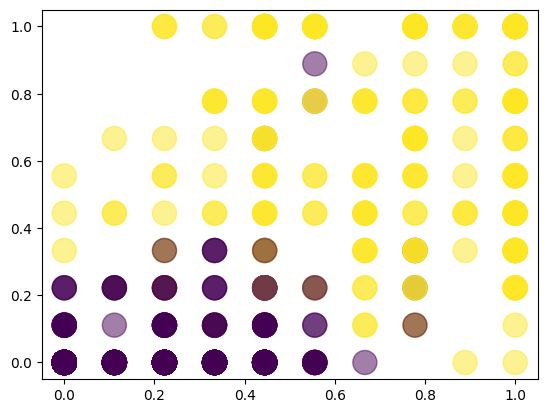

In [9]:
import matplotlib.pyplot as plt
print(X.shape)

plt.scatter(X[:,1], X[:, 2], c=y, s=300, alpha=0.5)

<img src="lab13_files/d.png">

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

### 3. Regresja 

Przeprowadź regresje liniową wg wzoru:
$$
\beta = (X^TX)^{-1}X^Ty
$$

In [11]:
B = np.linalg.inv(X.T @ X) @ (X.T @ y)

### 4. Wizualizacja Regresji

Zwizualizuj dane po zrzutowaniu na $\beta$ używajac metody `plt.hist`, tzn. narysuj histogramy $\beta X_+$ oraz
$\beta X_-$ gdzie $X_+$ to wiersze $X$ dla których $y=+1$ i analogicznie $X_-$. Postaraj się wygenerować czytelny wykres podobny do tego poniżej.

(array([ 0.,  1., 19., 54., 88., 67., 36., 34., 32., 29., 23., 21., 13.,
         5.,  3.,  0.,  3.,  4.,  1.,  0.,  1.,  0.,  1.,  2.,  0.,  0.,
         0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([-1.  , -0.94, -0.88, -0.82, -0.76, -0.7 , -0.64, -0.58, -0.52,
        -0.46, -0.4 , -0.34, -0.28, -0.22, -0.16, -0.1 , -0.04,  0.02,
         0.08,  0.14,  0.2 ,  0.26,  0.32,  0.38,  0.44,  0.5 ,  0.56,
         0.62,  0.68,  0.74,  0.8 ,  0.86,  0.92,  0.98,  1.04,  1.1 ,
         1.16,  1.22,  1.28,  1.34,  1.4 ,  1.46,  1.52,  1.58,  1.64,
         1.7 ,  1.76,  1.82,  1.88,  1.94,  2.  ]),
 <BarContainer object of 50 artists>)

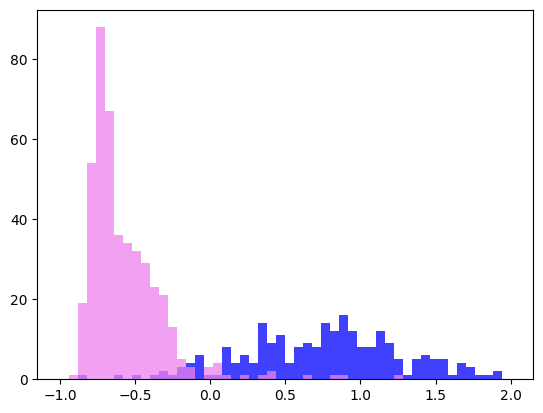

In [12]:
XP = np.array([r for r, i in zip(X, y) if i == 1])
XM = np.array([r for r, i in zip(X, y) if i == -1])
plt.hist(XP @ B, bins = 50, range=(-1, 2), color = 'b', alpha = 0.75)
plt.hist(XM @ B, bins = 50, range=(-1, 2), color = 'violet', alpha = 0.75)

<img src="lab13_files/lr1.png">

### 5. Klasyfikacja

Przeprowadź "klasyfikacje" naszych pacjentów, ci, którzy zostali zrzutowani na wartość ujemną dostają etykiete $-1$, a ci którzy na wartość dodatnia - etykiete $+1$

In [13]:
def etykiety(B):
    scores = X @ B
    cl = np.where(scores < 0, -1, 1)
    return cl
cl1 = etykiety(B)

### 6. Ewaluacja

Policz jak dokładny jest ten model, tzn. jak duży jest zbiór
$ \{ (x_i,y_i) : \mathrm{sign}(\beta x_i) = y_i \} $
w stosunku do rozmiaru całego $y$

Powinno udać się uzyskać wynik na poziomie 93-94%

In [14]:
def eval(c):
    return np.mean(np.sign(c) == y)
print(eval(cl1))

0.9487554904831625


### 7. Regularyzacja 
Dodaj parametr `C` do regresji liniowej
$$
\beta = (X^TX + \tfrac{1}{C}I)^{-1}X^Ty
$$

gdzie $I$ - macierz identyczności. 

Dla jakiej wartości `C` wynik jest najlepszy? Jaki wynik udało Ci sie uzyskać?

In [15]:
best_c, best_ev = 0, 0
prev = eval(cl1)

for c in np.linspace(0.00001, 500, 100000):
    B = np.linalg.inv(X.T @ X + (1/c) * np.identity(X.shape[1])) @ X.T @ y
    ev = eval(etykiety(B))
    #print("wartosc c : ", c, "wynik: ", ev*100, "%")
    if ev > prev:
        prev = ev
        best_c, best_ev = c, ev

print("c : ", best_c, "wynik: ", best_ev * 100, "%")

c :  0.7650176347763478 wynik:  95.02196193265007 %


### 8. Gratulacje
Właśnie stworzyłeś/-aś swój pierwszy klasyfikator (statystyczny model predykcji). 

Spróbuj zastosować go do innych danych.

### Zadanie dodatkowe

Zaimplementuj powyższą metode jako klase `LRClassifier` wyposażoną w następujące metody:

* konstruktor przyjmujący dwa parametry: 
    * `C` - stała z równania 
    * `scale` - zmienna boolowska (domyslnie `True`) która określa czy macierz `X` ma byc automatycznie znormalizowana (przeskalowana do `[0,1]`)
* `.fit(X, y)` która spowoduje obliczenie $\beta$, dla `X` - dowolnej macierzy, `y` - wektora etykiet skladajacego sie z dwóch unikalnych wartosci (mogą to byc np. 2 różne stringi)
* `.predict(X)`, która zwróci wektor zawierajacy na `i`tej pozycji etykiete "przewidzianą" przez nasz model (pamiętaj o skalowaniu jesli `scale==True`!)

Przykladowe użycie:

    clf = LRClassifier(C=100)
    Xt = np.array([[1, 0], [1, 1], [1, 2], [1, 3], [1, 4]])
    yt = np.array(['x', 'x', 'y', 'y', 'y'])
    clf.fit(Xt, yt)
    X = np.array([[1, -1], [1, 0.9], [1, 2.1]])
    print(clf.predict(X)) # ['x', 'x', 'y']

In [18]:
class LRClassifier:

    def __init__(self, C, scale=True):
        self.C = C
        self.scale = scale
        self.B = None
        self.X_max = None
        self.X_min = None
        self.label_map = None
        self.inv_label_map = None

    def fit(self, X, y):
        if self.scale:
            self.X_max = X.max(axis=0)
            print(self.X_max)
            self.X_min = X.min(axis=0)
            X = self._scale(X)

        unique_labels = np.unique(y)
        self.label_map = {unique_labels[0]: -1, unique_labels[1]: 1}
        self.inv_label_map = {-1: unique_labels[0], 1: unique_labels[1]}
        y_v = np.vectorize(lambda x: self.label_map[x])(y)
        self.B = np.linalg.inv(X.T @ X + (1/self.C) * np.identity(X.shape[1])) @ X.T @ y_v

    def predict(self, X):
        if self.scale:
          X = self._scale(X)

        y_p = np.where(X @ self.B < 0, -1, 1)
        return np.vectorize(lambda x: self.inv_label_map[x])(y_p)

    def _scale(self, X):
        r = (self.X_max - self.X_min)
        r[r == 0] = 1
        return (X - self.X_min) / r


clf = LRClassifier(C=100, scale=False)
Xt = np.array([[1, 0], [1, 1], [1, 2], [1, 3], [1, 4]])
yt = np.array(['x', 'x', 'y', 'y', 'y'])
clf.fit(Xt, yt)
X = np.array([[1, -1], [1, 0.9], [1, 2.1]])
print(clf.predict(X))


['x' 'x' 'y']
